PRIM'S ALGORITHM
--

In [1]:
from datetime import datetime
current_date_time = datetime.now()
formatted_date_time = current_date_time.strftime("%Y-%m-%d %H:%M:%S")
author = 'Federico Targa'
print('------------------------------------')
print("| Date & Hour:", formatted_date_time,'|')
print('------------------------------------')
print('------------------------------------')
print('     |Author: ', author                 ,'|')
print('------------------------------------')

------------------------------------
| Date & Hour: 2023-08-14 17:12:44 |
------------------------------------
------------------------------------
     |Author:  Federico Targa |
------------------------------------


Prim's algorithm is a greedy algorithm used to find the minimum spanning tree (MST) of a connected, undirected graph with weighted edges. A minimum spanning tree is a subset of the edges of the graph that connects all the vertices while minimizing the total edge weight.

Here's how Prim's algorithm works in detail:

- Initialization: Start with an arbitrary vertex as the initial MST. You can choose any vertex as a starting point.

- Create Data Structures: 
  - Maintain a data structure (often a priority queue or a min-heap) to keep track of the vertices not yet   included in the MST.
  - Initialize the data structure with the chosen starting vertex and assign a distance value of 0 to it. The distance value for all other vertices is initially set to infinity.

- Greedy Selection: 
  - While the data structure is not empty, repeatedly do the following:
    - Extract the vertex with the minimum distance value from the data structure. This vertex will be added to the MST.
    - Explore all the edges connected to the extracted vertex that lead to vertices not yet included in the MST.

- Update Distances: 
  - For each adjacent vertex that is not yet in the MST, calculate the weight of the edge connecting it to the current MST vertex.
  - If the calculated weight is less than the distance value currently associated with that vertex in the data structure, update the distance value.

- Repeat:
  - Repeat step 3 and step 4 until all vertices are included in the MST.

- MST Construction:
  - The MST is constructed incrementally as vertices are added to it through the algorithm's iterations.

- Termination:
  - When all vertices are included in the MST, the algorithm terminates.

At the end of Prim's algorithm, you have constructed a minimum spanning tree that connects all the vertices of the original graph while minimizing the total edge weight. The algorithm guarantees that the MST will have n−1n−1 edges for a graph with nn vertices, and it's important to note that the order in which you add vertices to the MST does not affect the final result.

Prim's algorithm is efficient, especially when implemented with a priority queue or a min-heap for efficient extraction of the minimum distance vertex. Its time complexity is typically O(E+Vlog⁡V)O(E+VlogV), where EE is the number of edges and VV is the number of vertices in the graph.

This algorithm is often used in scenarios like designing network infrastructure, minimizing costs in transportation networks, and creating efficient circuit layouts, among other applications.

How does it works when a graph is given?
In order to avoid any specification, we shortest way to implement it is creating a random grapg G(V,N)

In [2]:
import random
import networkx as nx
import matplotlib.pyplot as plt

# Number of vertices and edges
num_vertices = 5
num_edges = 8

# Create a random graph
G = nx.Graph()

# Add vertices
G.add_nodes_from(range(num_vertices))

# Add random edges with random weights
for _ in range(num_edges):
    edge = random.sample(range(num_vertices), 2)
    weight = random.randint(1, 20)
    G.add_edge(edge[0], edge[1], weight=weight)


In [3]:
# Print out the graph details
print("Vertices:", G.nodes())
print("Edges:", G.edges(data=True))

Vertices: [0, 1, 2, 3, 4]
Edges: [(0, 4, {'weight': 14}), (0, 2, {'weight': 13}), (0, 1, {'weight': 16}), (2, 3, {'weight': 9}), (3, 4, {'weight': 3})]


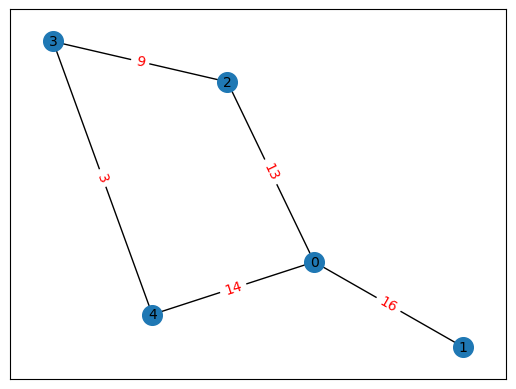

In [4]:
# Draw the graph
pos = nx.spring_layout(G)  # Positioning of nodes for visualization
nx.draw_networkx(G, pos, with_labels=True, node_size=200, font_size=10, font_color='black')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
plt.show()

Now, Let's apply Prim's algorithm to find the minimum spanning tree (MST) on the randomly generated graph.

Sequence of edges added to MST:
(0, 2)
(2, 3)
(3, 4)
(0, 1)


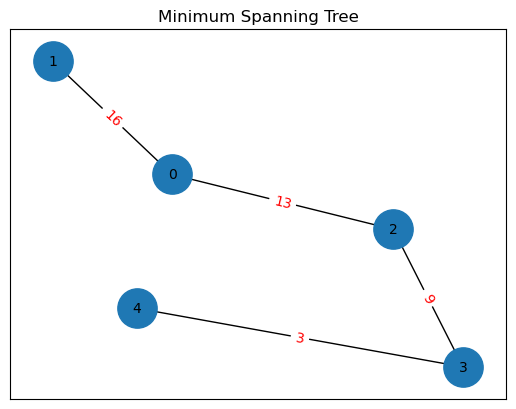

In [5]:
# Prim's algorithm to find minimum spanning tree
def prim_mst(graph):
    mst = nx.Graph()
    start_vertex = random.choice(list(graph.nodes()))
    mst.add_node(start_vertex)
    
    mst_sequence = []  # To store the sequence of edges added to the MST
    
    while len(mst) < len(graph):
        min_edge = None
        min_weight = float('inf')
        
        for node in mst.nodes():
            for neighbor, data in graph[node].items():
                if neighbor not in mst.nodes() and data['weight'] < min_weight:
                    min_edge = (node, neighbor)
                    min_weight = data['weight']
        
        if min_edge:
            mst.add_edge(*min_edge, weight=min_weight)
            mst_sequence.append(min_edge)
    
    return mst, mst_sequence

# Calculate MST and get the sequence using Prim's algorithm
mst, mst_sequence = prim_mst(G)

# Print the sequence of edges added to the MST
print("Sequence of edges added to MST:")
for edge in mst_sequence:
    print(edge)

# Draw the MST
pos = nx.spring_layout(G)  # Positioning of nodes for visualization
nx.draw_networkx(mst, pos, with_labels=True, node_size=800, font_size=10, font_color='black')
edge_labels = nx.get_edge_attributes(mst, 'weight')
nx.draw_networkx_edge_labels(mst, pos, edge_labels=edge_labels, font_color='red')
plt.title("Minimum Spanning Tree")
plt.show()